In [169]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [170]:
data = pd.read_csv("../data/billionaire_list_20yrs.csv")\
        .dropna()\
        .drop(['last_name', 'last_name', 'name', 'wealth_source_details', 'company', 'industry', 'headquarters', 'age', 'state', 'permanent_country', 'daily_income', 'Unnamed: 0'], axis=1)
data['birth_year'] = pd.to_datetime(data['birth_year'], format='%Y')
data['main_industry'] = data['main_industry'].str.replace('&', 'and')
data.drop_duplicates(keep='first',inplace=True)
data['countries'] = data['countries'].str.split(';',expand=True)[0]

In [171]:
data.head()

,gender,time,main_industry,countries,annual_income,birth_year,name_cleaned
1199,M,2012,Fashion and Retail,usa,152880000,1953-01-01,hank_doug_meijer
1210,M,2013,Fashion and Retail,usa,154200000,1953-01-01,hank_doug_meijer
1221,M,2014,Fashion and Retail,usa,258060000,1953-01-01,hank_doug_meijer
1232,M,2015,Fashion and Retail,usa,327098999,1953-01-01,hank_doug_meijer
1243,M,2016,Fashion and Retail,usa,250673999,1953-01-01,hank_doug_meijer


### number of billionares

In [172]:
data["name_cleaned"].unique().shape[0]

700

maximum annual income

minumum annual income

average annual income

### number of bilionares by gender

In [173]:
df = data[['gender', 'name_cleaned']]\
        .drop_duplicates(keep='first')\
        .groupby('gender')\
        .count()\
        .reset_index()

fig = px.pie(df, names=df['gender'], values=df['name_cleaned'], hole=0.4, title="Bilionares by gender")

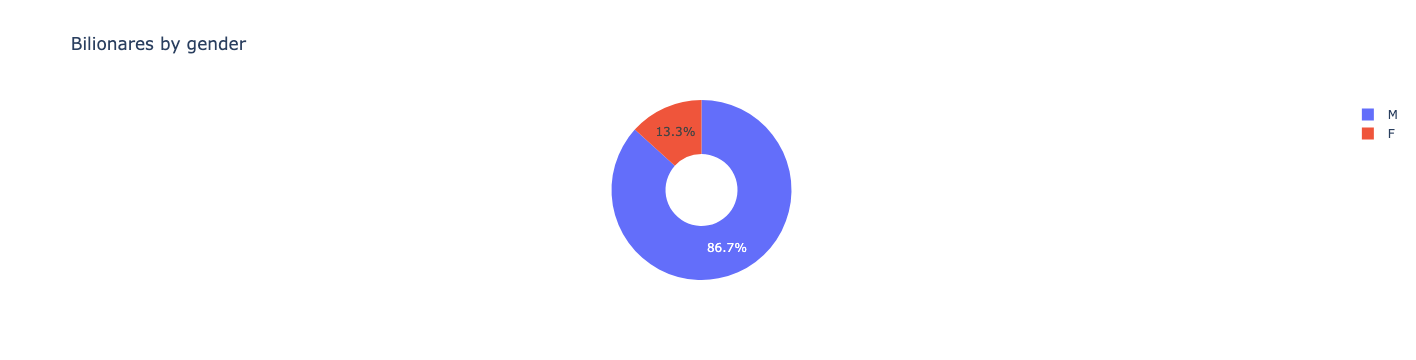

In [174]:
fig

### Bilionares by industry

In [175]:
df = data[['main_industry', 'name_cleaned']].drop_duplicates(keep='first').groupby('main_industry').count().sort_values(by='name_cleaned')
df.rename(columns={'name_cleaned': 'bilionares'}, inplace=True)

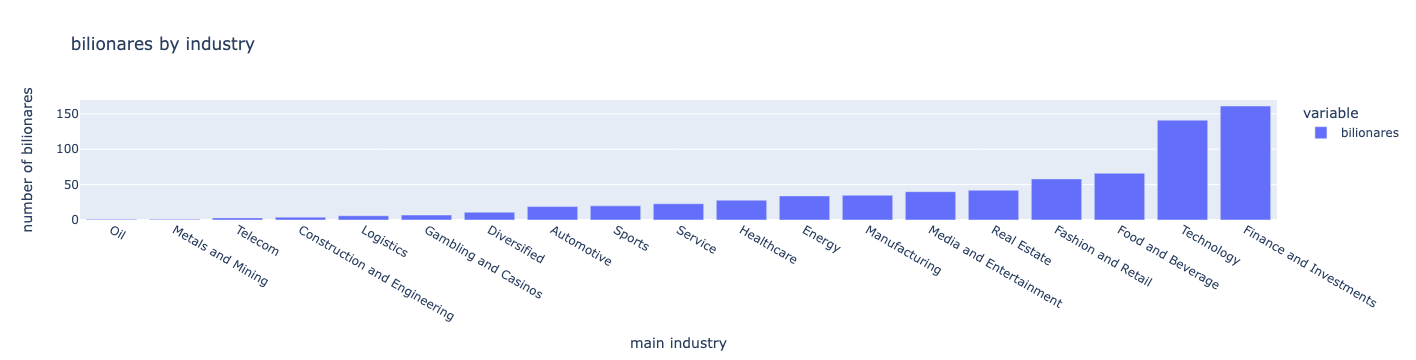

In [176]:
px.bar(df, title='bilionares by industry', labels={'main_industry': 'main industry', 'value': 'number of bilionares'})

### bilionares by age

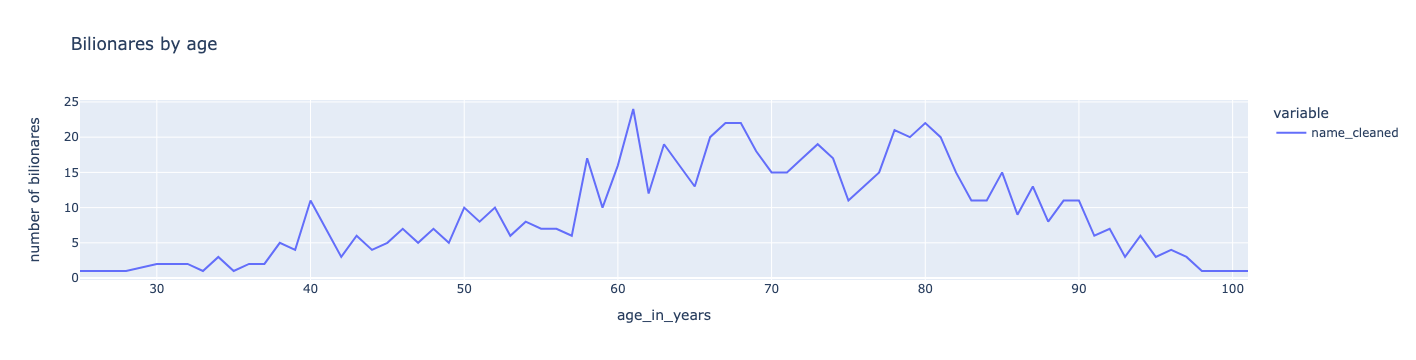

In [177]:
nownow = datetime.now()
data['age_in_years'] = round((now - data['birth_year']) / (365*np.timedelta64(1, 'D')))
df = data[['name_cleaned', 'age_in_years']].drop_duplicates(keep='first').groupby('age_in_years').count()
px.line(df, title='Bilionares by age', labels={'age_in_year': 'age', 'value': 'number of bilionares'})

### main industry by average annual income

### main industry by industry average annual income

### bilionares by country

In [183]:
data[['countries', 'name_cleaned']].drop_duplicates(keep="first").groupby('countries').count().T

countries,aus,can,che,chn,deu,fra,gbr,irl,isr,kwt,mco,mex,nor,rou,rus,tur,usa
name_cleaned,2,8,1,2,3,4,4,2,3,1,1,1,1,1,1,2,663
